# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
## Complete the code to import the data
data = pd.read_csv('/content/drive/MyDrive/Python Course/Unsupervised Learning/Project 7 _ Unsupervised Learning _ Trade&Ahead/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.




*   There are 340 rows and 15 columns.



### Displaying few rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620




*   The data appears to have 4 categorical columns and 11 numerical columns
*   Negative price changes indicate decrease in stock price over the previous 13 weeks
*   Negative net cash flow, net income, and earnings per share indicate, respectively, net cash outflow, total expenses, interest, and taxes greater than revenues, net loss by the respective companies
*   Negative P/B ratios indicate that the companies have more liabilities than assets







### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R



*   We have confirmation that the data contains 4 categorical columns and 11 numerical (7 float and 4 int) columns
*   No obvious missing values





### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0



*   The data contains no duplicates



In [ ]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64



*   We have confirmation that the data contains no obvious null values



### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02




*   Only Price Change, Net Cash Flow, and Net Income, Earnings Per Share, and P/B Ratio contain negative values; these are acceptable scenarios
*   The means of Current Price, Volatility, ROE, Cash Ratio, Net Cash Flow, Net Income, Estimated Shares Outstanding, and P/E Ratio are greater than their respective medians, indicating that these variables might be right-skewed
*   The means of Price Change, Earnings Per Share, and P/B Ratio  are less than their respective medians, indicating that these variables might be left-skewed
*   Comparing the minimum values, first quartile, median, third quartile, and maximum values, we expect the data to contain some outliers





In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16




*   Ticker Symbol and Security each have 340 unique values while GICS Sub Industry and GICS Sector respectively have 104 and 11 distinct values
*   The mode of GICS Sub Industry is "Oil & Gas Exploration & Production" whereas that of GICS Sector is "Industrials"



## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

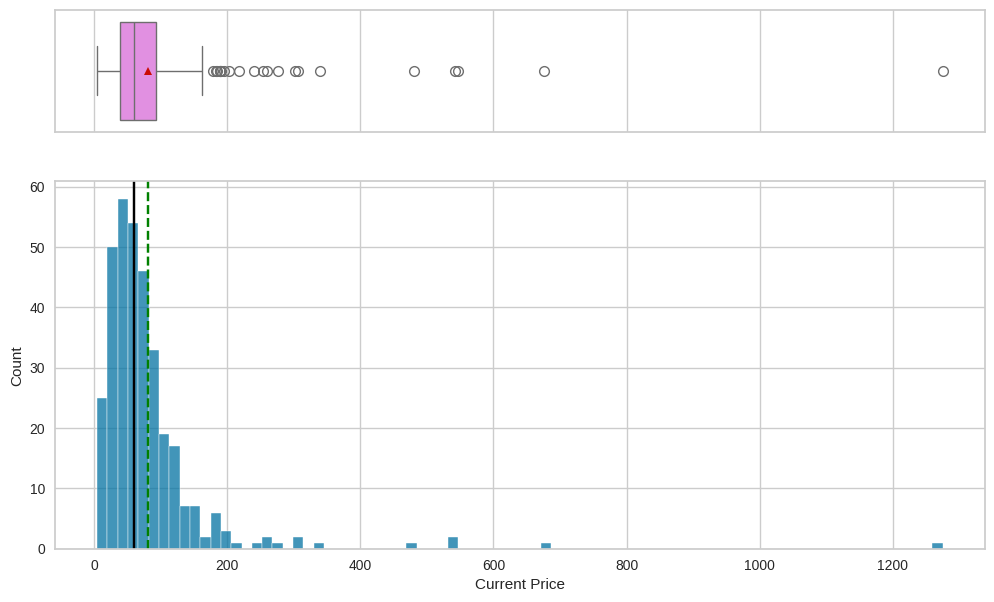

In [ ]:
histogram_boxplot(df, 'Current Price')



*   We have confirmation that the distribution of Current Price is right-skewed with several upper outliers
*   The mean, about 80, is 20 greater than the median



**`Price Change`**

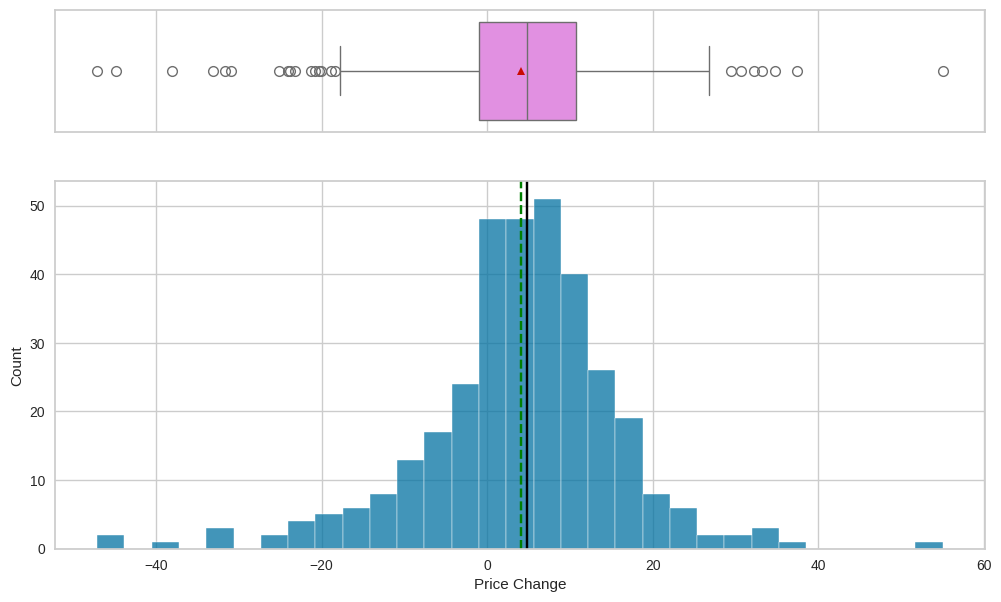

In [ ]:
histogram_boxplot(df, 'Price Change')  ## Complete the code to create histogram_boxplot for 'Price Change'



*   Price Change is left-skewed but slightly symmetrical with several outliers on both ends of the distribution
*   The mean, 4, is 1 lower than the median



**`Volatility`**

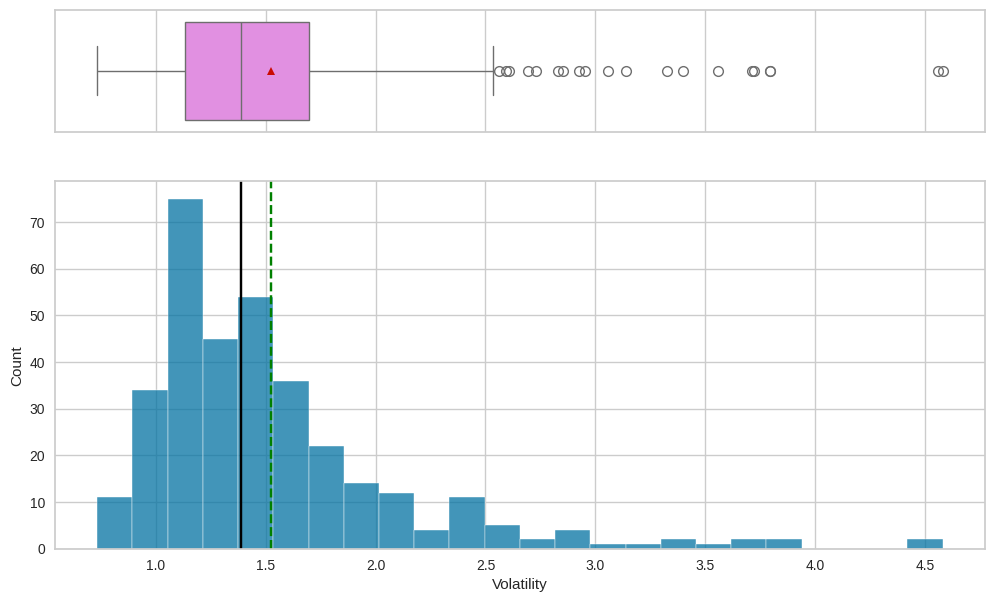

In [ ]:
histogram_boxplot(df, 'Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'



*   Volatility is heavily right-skewed with several upper outliers
*   The mean, about 1.5, is approximately 0.16 greater than the median



**`ROE`**

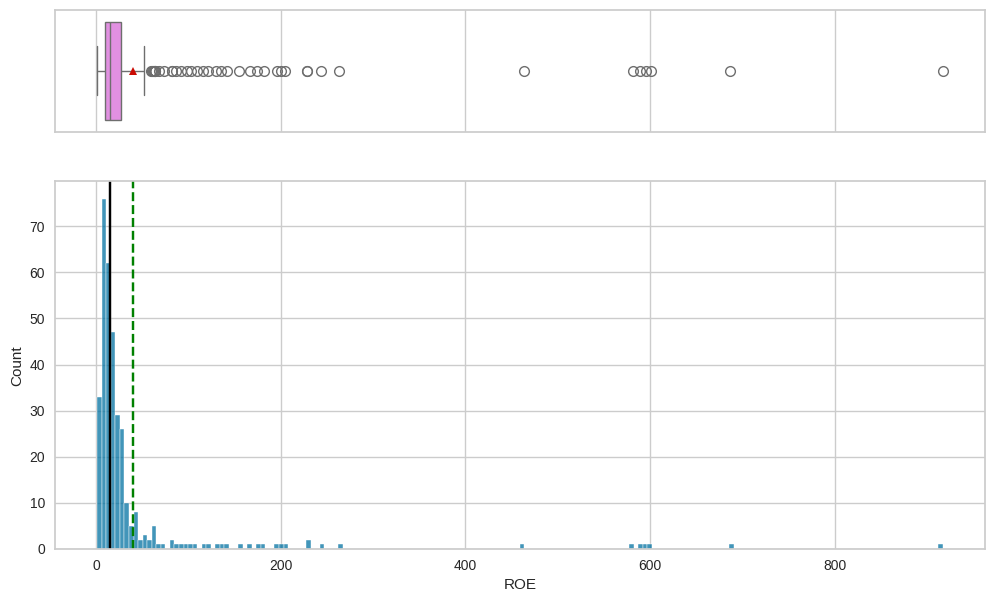

In [ ]:
histogram_boxplot(df, 'ROE')  ## Complete the code to create histogram_boxplot for 'ROE'



*   The ROE is heavily right-skewed with several upper outliers
*   The mean, 40, is 25 greater than the median



**`Cash Ratio`**

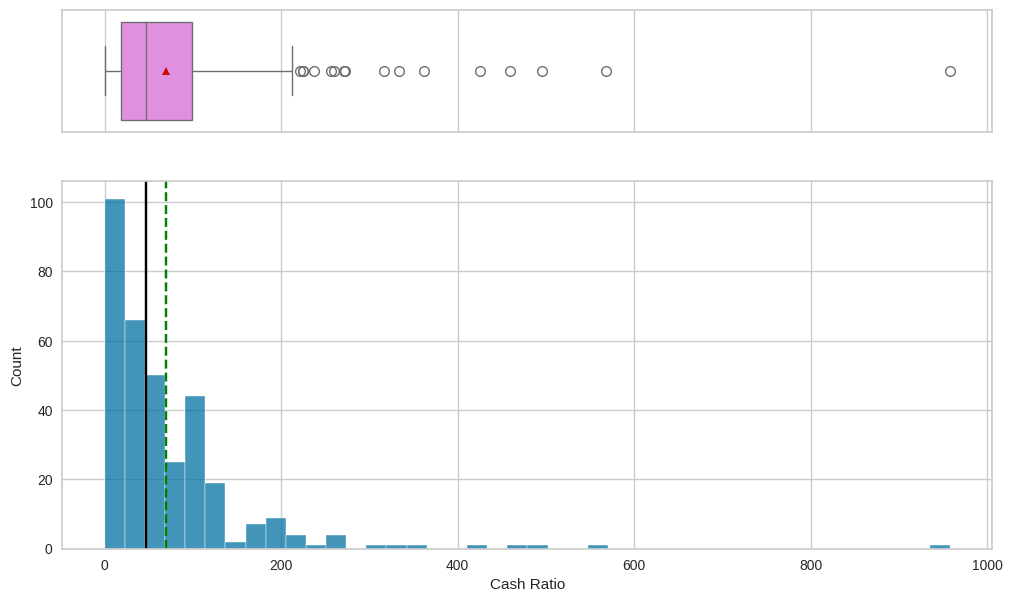

In [ ]:
histogram_boxplot(df, 'Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'



*   The cash ratio is right-skewed with several upper outliers
*   The mean, 70, is 23 greater than the median



**`Net Cash Flow`**

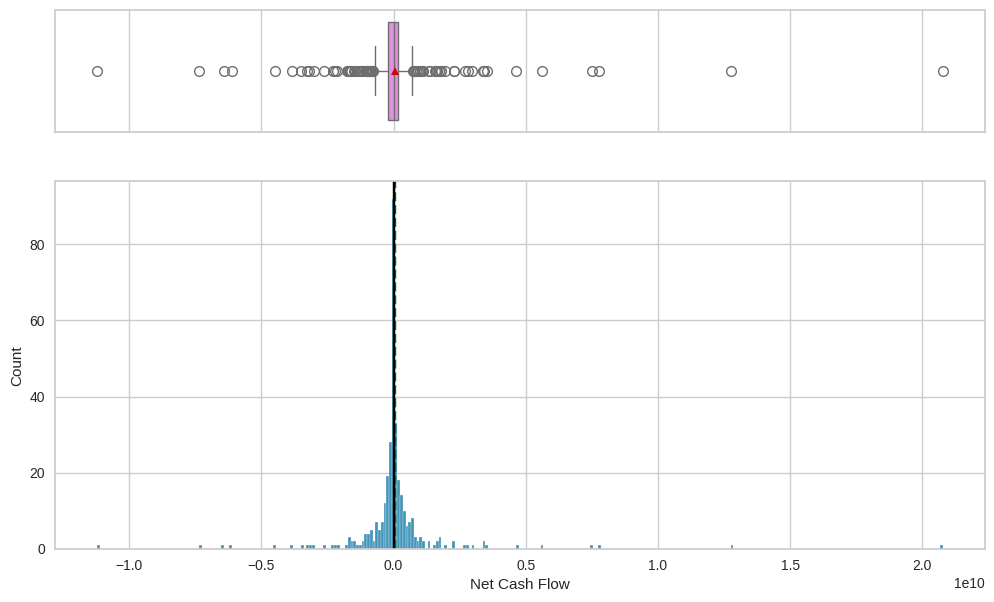

In [ ]:
histogram_boxplot(df, 'Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'



*   Though the mean of the Net Cash Flow is about 56 M and the median about 2 M, the distribution is approximately normal with several outliers on both sides



**`Net Income`**

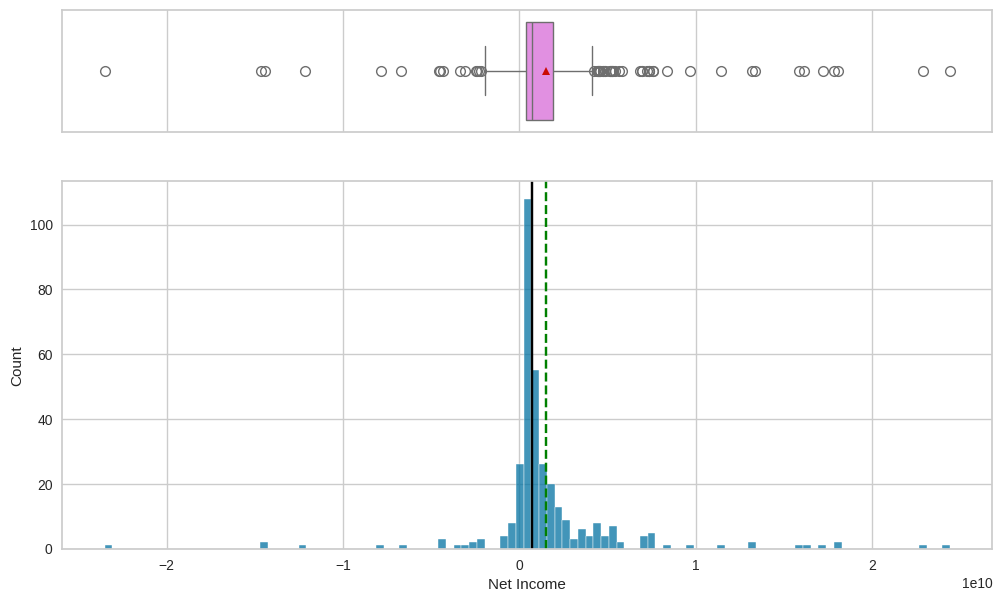

In [ ]:
histogram_boxplot(df, 'Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'



*   The distribution of Net Income displays some level of symmetry but is right-skewed and has several outliers on both sides of the distribution
*   The mean, about 1.5 B is approximately twice the median, about 700 M



**`Earnings Per Share`**

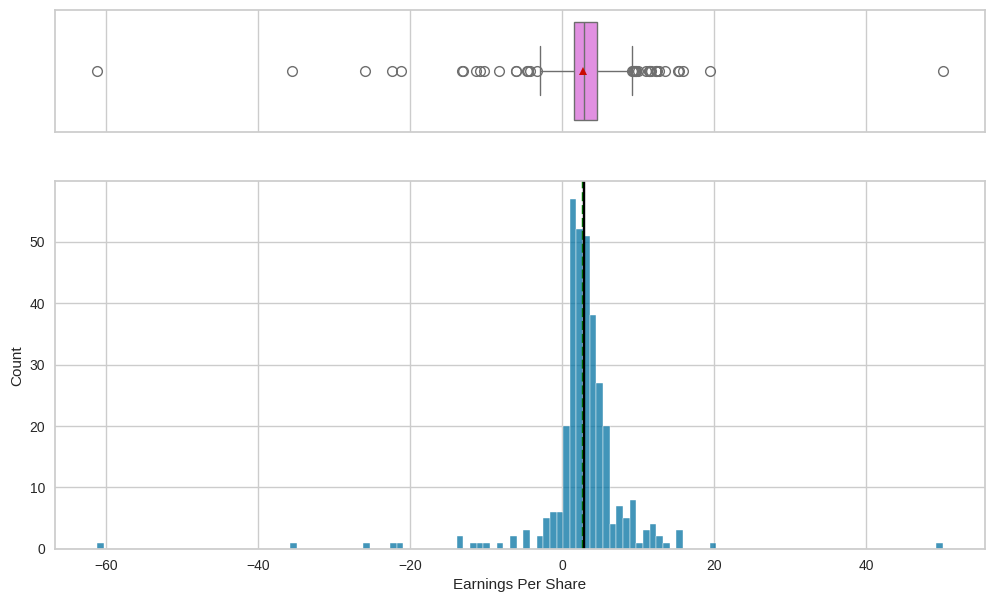

In [ ]:
histogram_boxplot(df, 'Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'



*   The Earnings Per Share is approximately normal with several outliers on both sides of the distribution
*   The mean, 2.8, is just about 0.1 less than the median



**`Estimated Shares Outstanding`**

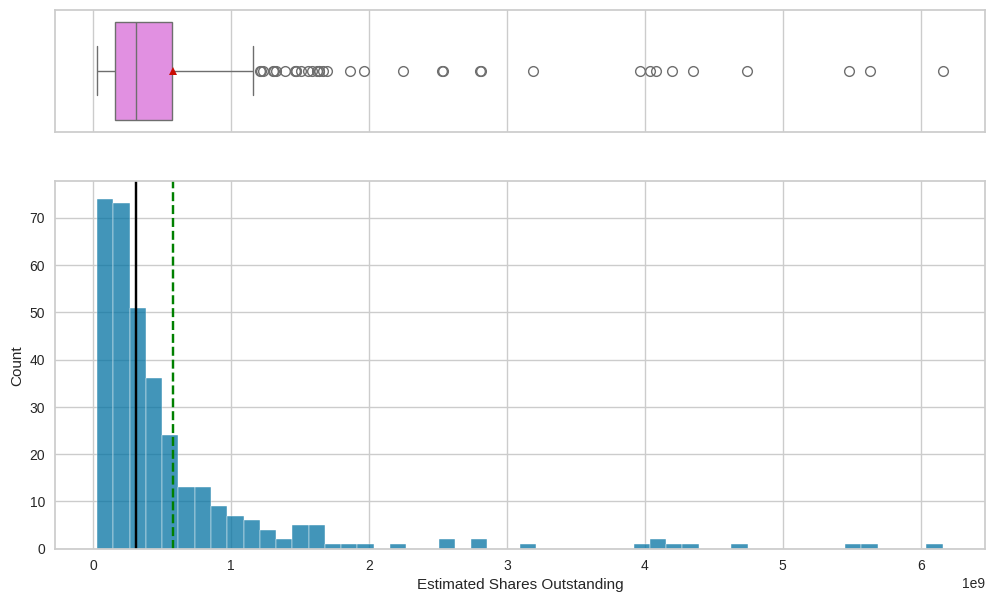

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'



*   The Estimated Shares Outstanding is right-skewed with several upper outliers
*   The mean, about 580 M, is greater than the median, about 310 M



**`P/E Ratio`**

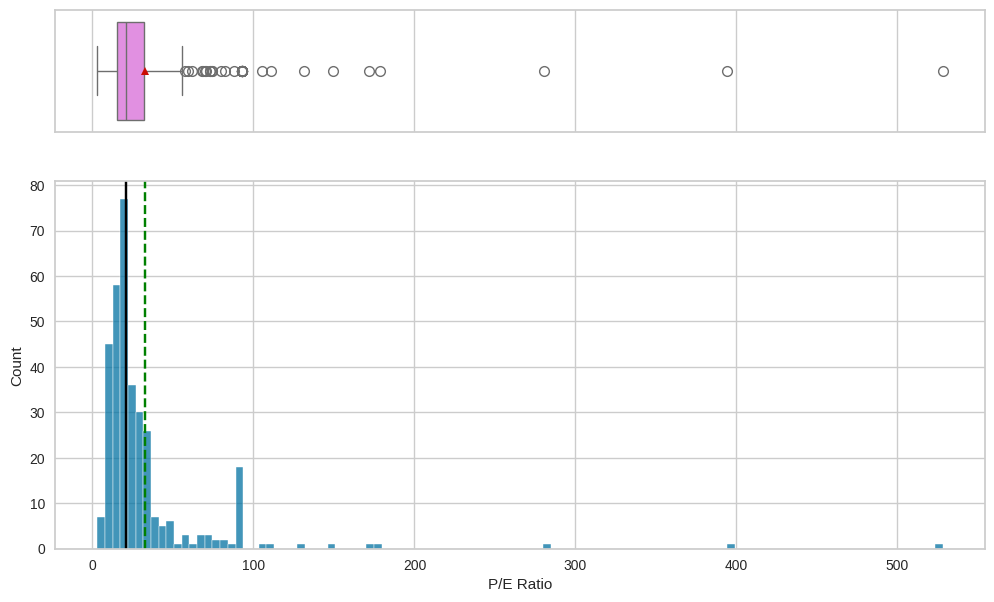

In [ ]:
histogram_boxplot(df, 'P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'



*   The P/E Ratio is heavily right-skewed with several upper outliers
*   Peak observed between 80 and 100
*   The mean, about 33, is approximately 12 greater than the median



**`P/B Ratio`**

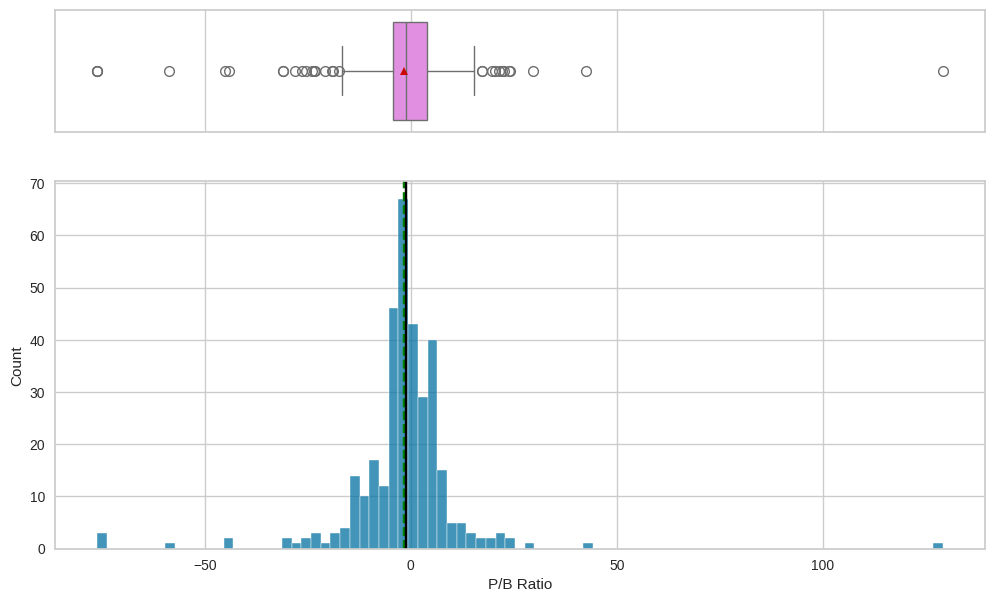

In [ ]:
histogram_boxplot(df, 'P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'



*   The P/B Ratio is approximately normally distributed with several outliers on both sides of the distribution
*   The mean, about -2, is 1 less than the median



In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

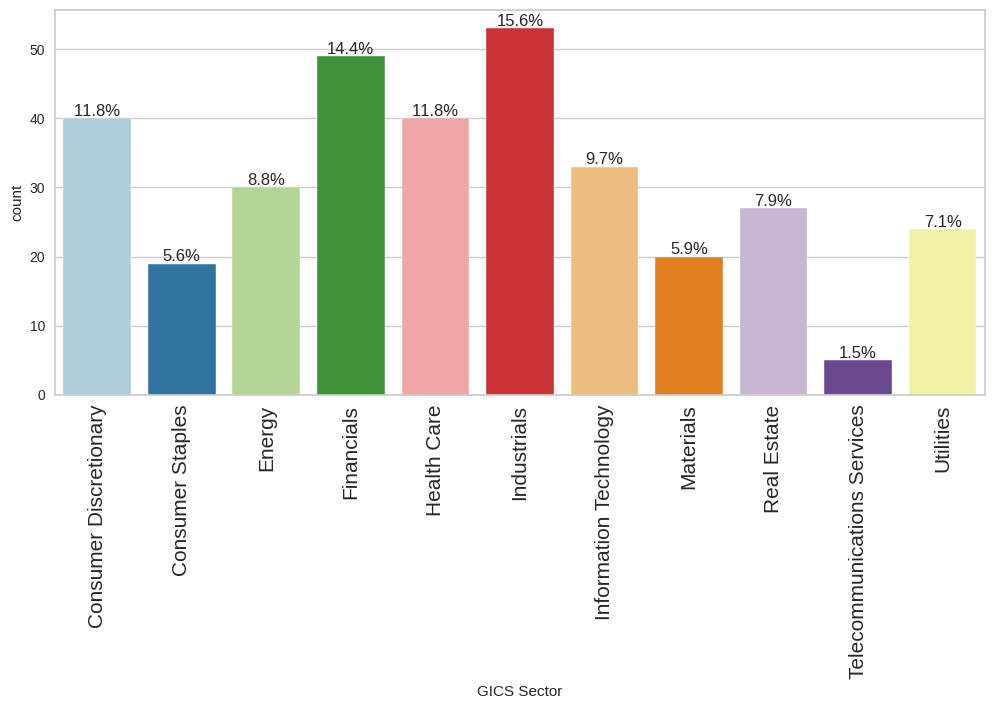

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)



*   Industrials, at 15.6%, constitute the most popular GICS Sector, followed but Financials (14.4%), Consumer Discretionary and Health Care (11.8% each)
*   Telecommunications Services constitute the least popular sector (1.5%)



**`GICS Sub Industry`**

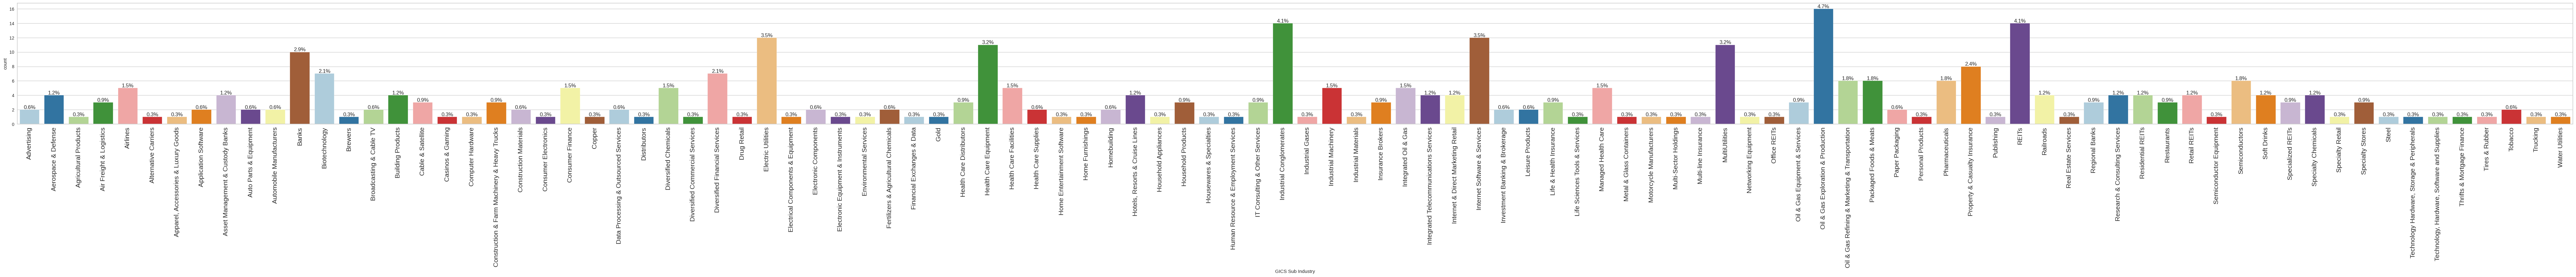

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

In [ ]:
df['GICS Sub Industry'].value_counts(1, ascending=False)

Oil & Gas Exploration & Production                 0.047059
REITs                                              0.041176
Industrial Conglomerates                           0.041176
Electric Utilities                                 0.035294
Internet Software & Services                       0.035294
Health Care Equipment                              0.032353
MultiUtilities                                     0.032353
Banks                                              0.029412
Property & Casualty Insurance                      0.023529
Diversified Financial Services                     0.020588
Biotechnology                                      0.020588
Pharmaceuticals                                    0.017647
Packaged Foods & Meats                             0.017647
Oil & Gas Refining & Marketing & Transportation    0.017647
Semiconductors                                     0.017647
Diversified Chemicals                              0.014706
Consumer Finance                        



*   Oil & Gas Exploration & Production (4.7%) is the most popular GICS Sub Industry followed by REITs and Industrial Conglomerates (4.1% each)
*   42 GICS Sub Industries occupy the lowest rank of popularity (0.3% each)



### Bivariate Analysis

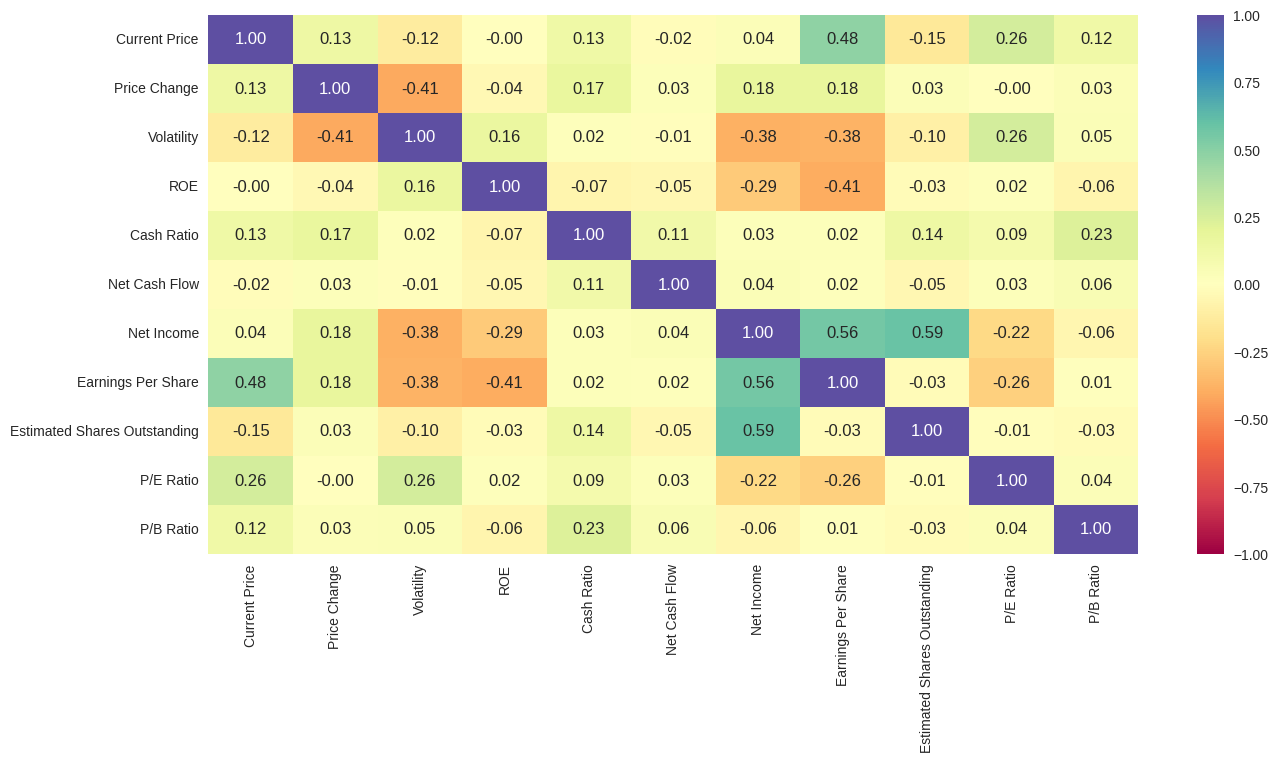

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   A fair amount of positive correlation is observed between Net Income on the one hand and Earnings Per Share and Estimated Shares Outstanding on the other; a little less between Earnings Per Share and Current Price
*   Weaker negative correlations are observed between Volatility on the one hand and Net Income and Earnings Per Share on the other, between Price Change and Volatility, and between ROE and Earnings Per Share



**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

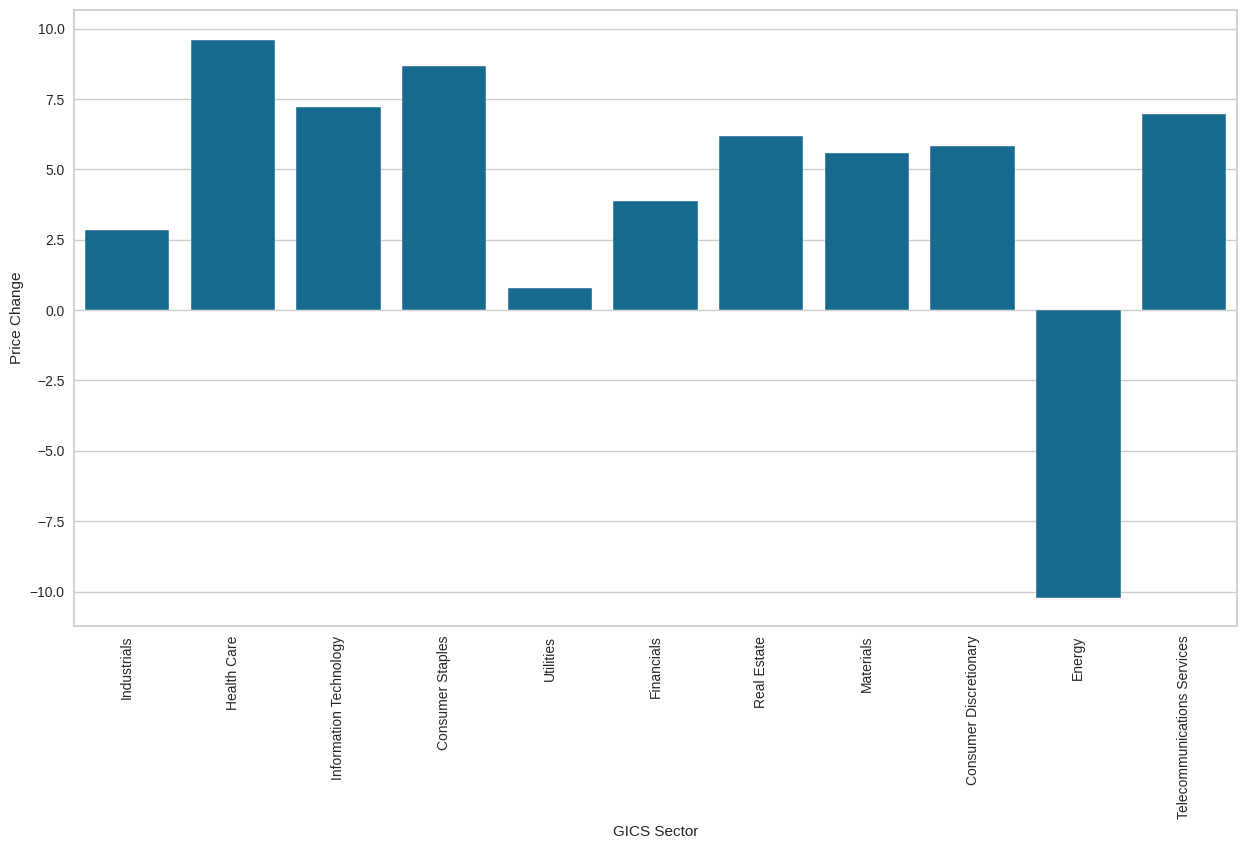

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()



*   Health Care registered the highest percentage price increase in 13 weeks followed by Consumer Staples and then Information Technology
*   Energy is the only GICS Sector that registered a percentage price decrease



**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

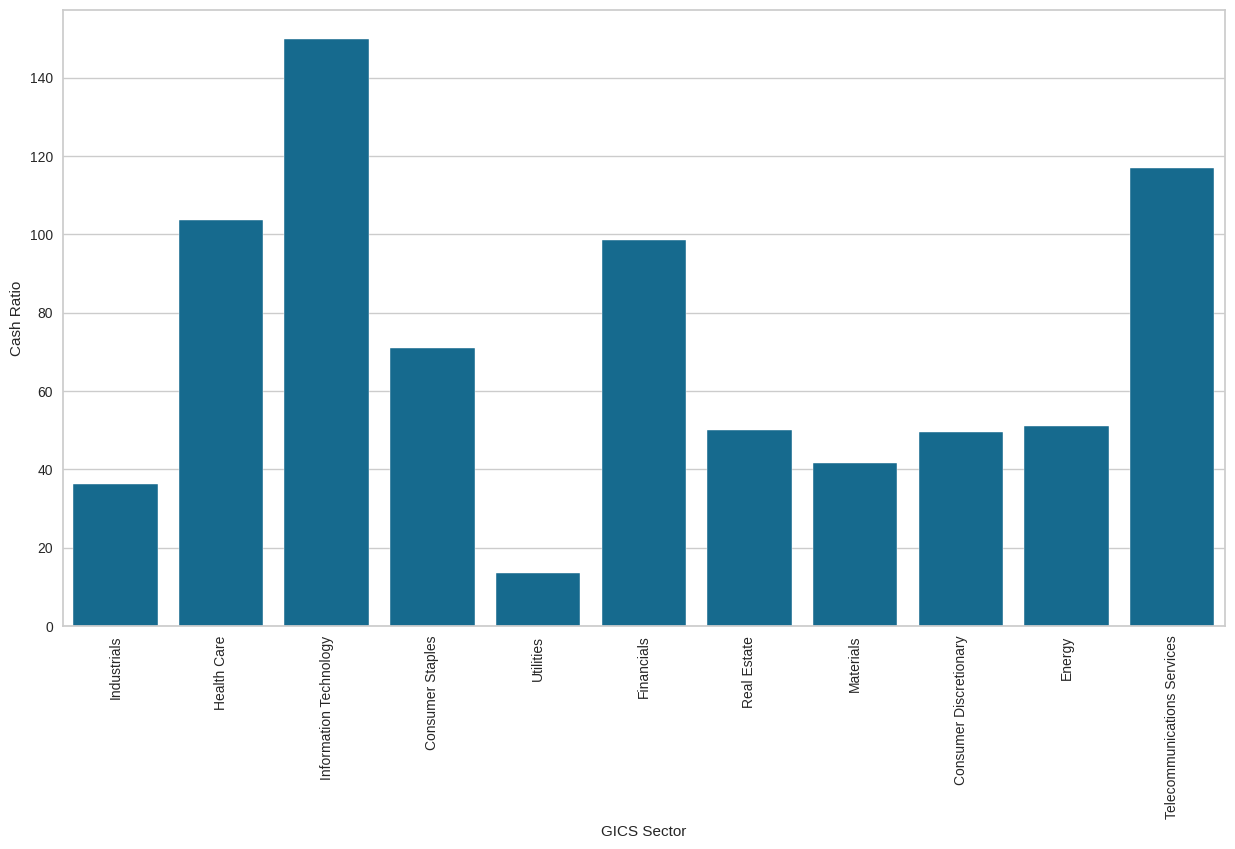

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()



*   The highest cash ratio was registered for Information technology (between 140 and 160) followed by Telecommunications Services (between 110 and 120), Health Care (between 100 and 110), and Financials (between 90 and 100)
*   The lowest cash ratio was registered for Utilities (about 10) followed by Industrials (between 30 and 40)



**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

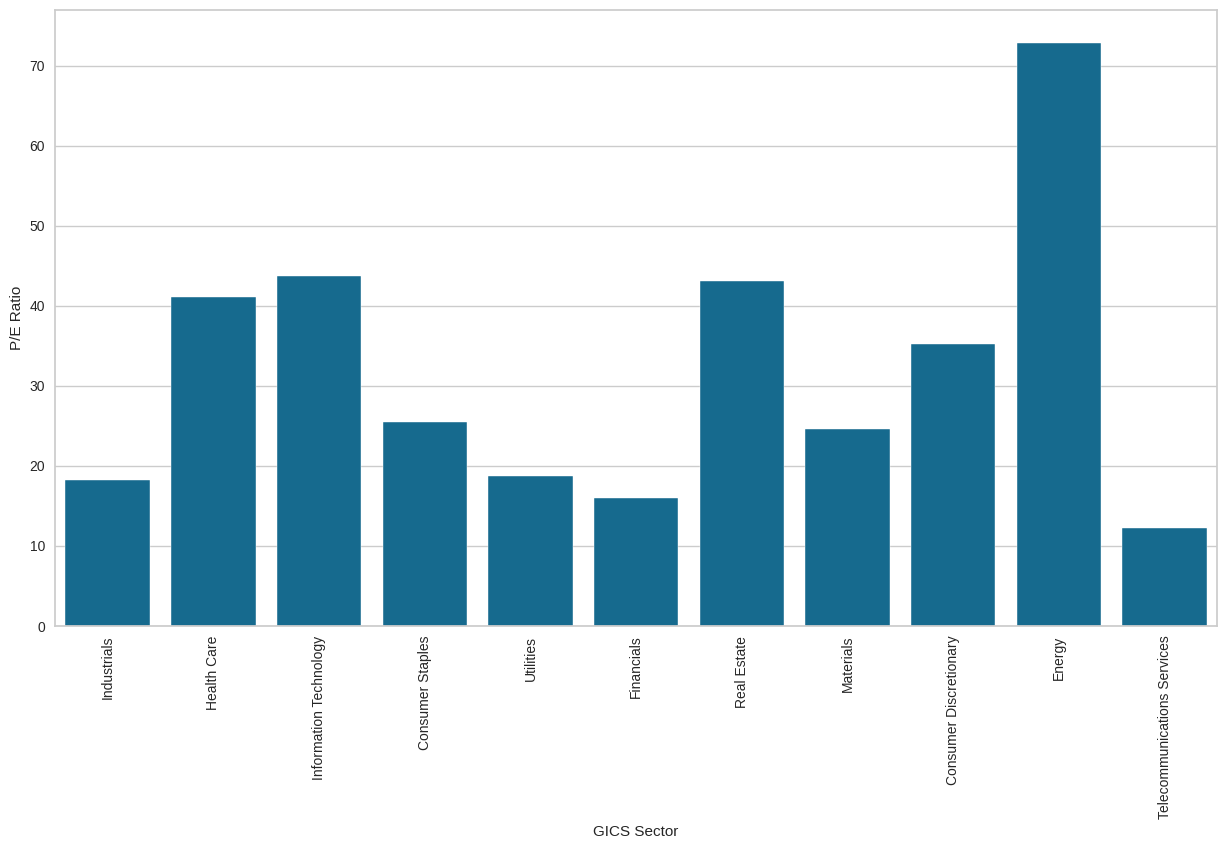

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()



*   Energy, the only GICS Sector that registered a percentage price decrease, has, by far, the highest P/E Ratio (over 70) followed by Real Estate, Information Technology, and Health Care (each between 40 and 45)
*   Telecommunications Services registered the lowest P/E Ratio (between 10 and 15)



**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

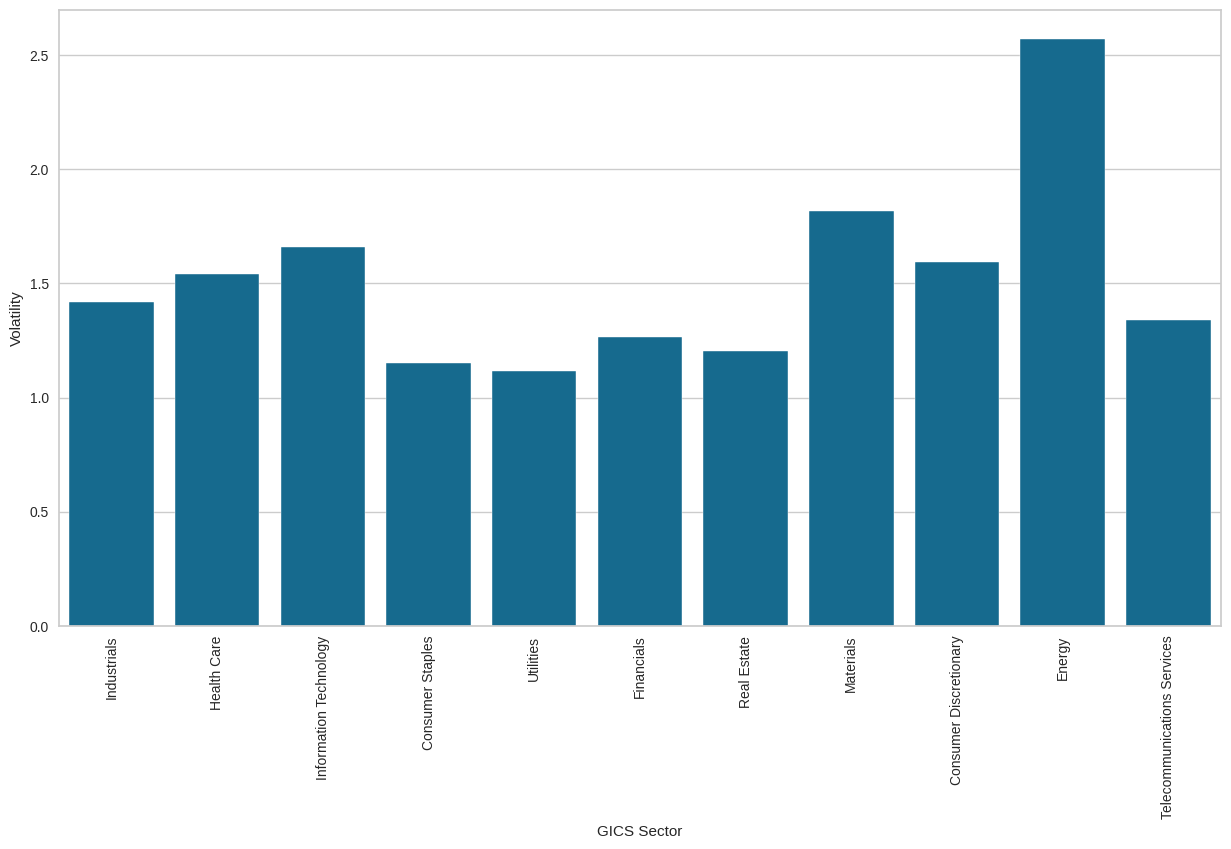

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()



*   Once again, Energy enjoys the top position with a volatility rating of over 2.5 followed by Materials (between 1.75 and 2.0) and Information Technology, Consumer Discretionary, and Health Care (all between 1.5 and 1.75)
*   The lowest ranks are occupied by Utilities, Consumer Staples, and Real Estate (each between 1.0 and 1.25) followed by Financials (about 1.25) and Telecommunications Services (between 1.25 and 1.5)



## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

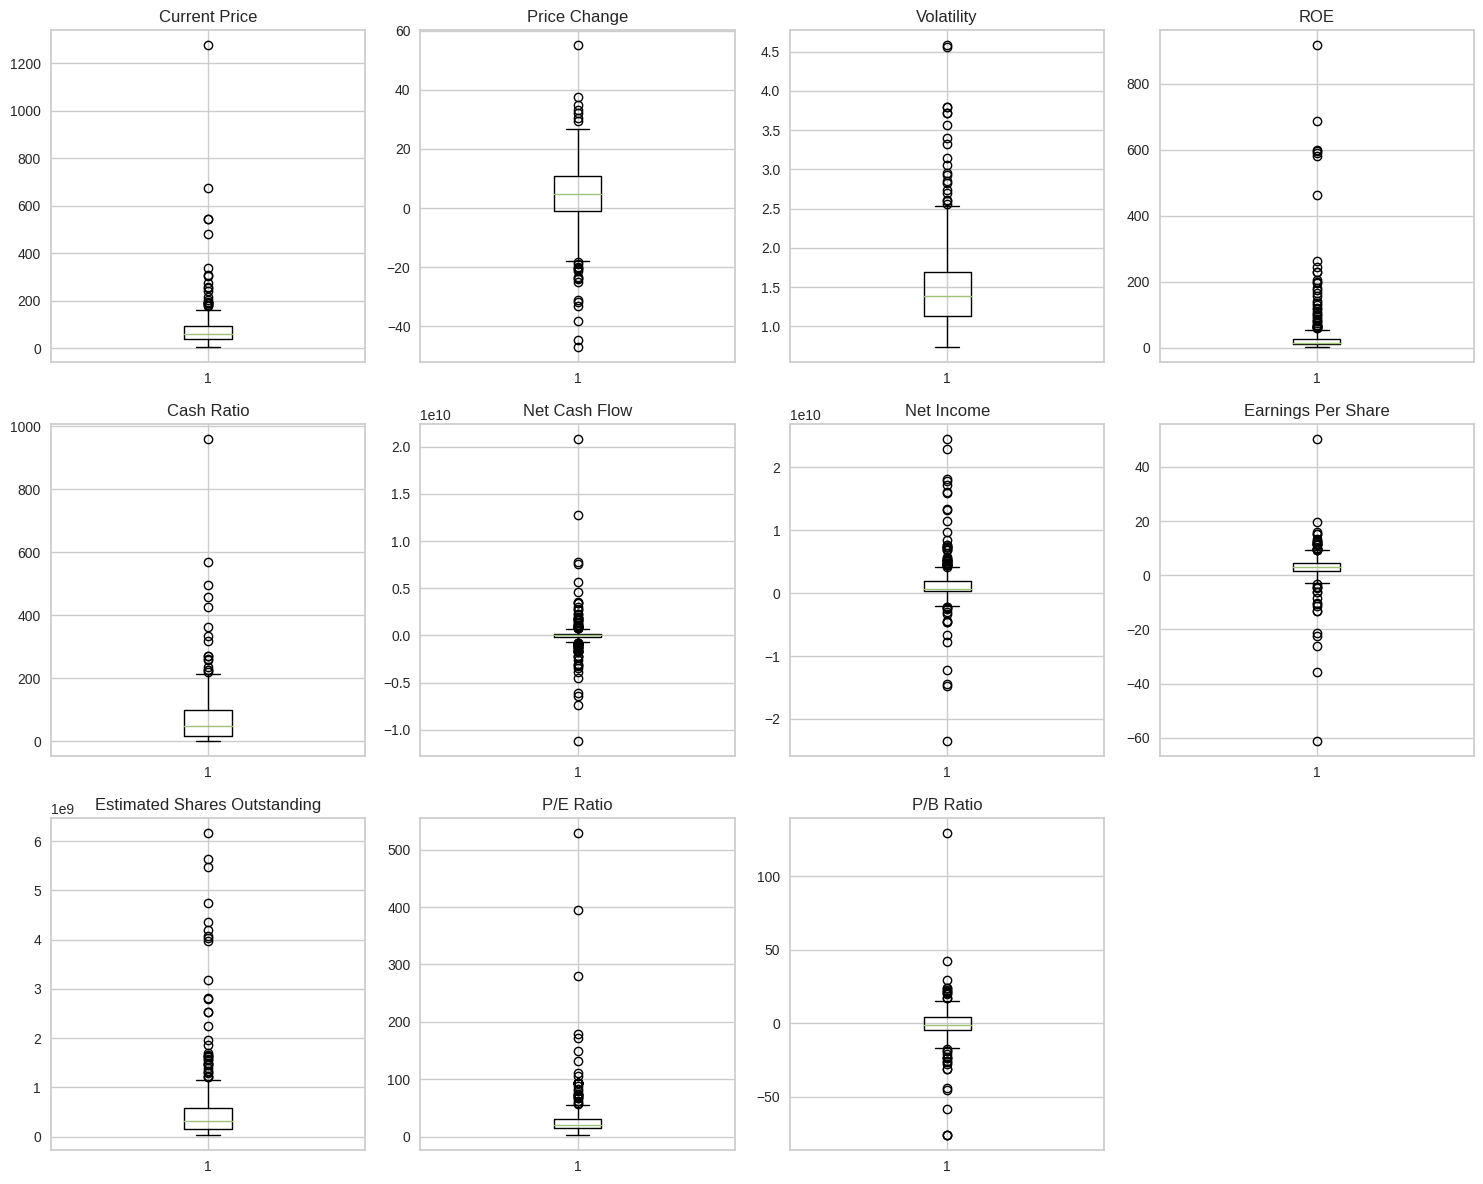

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   All the numerical columns contain outliers



### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.select_dtypes(include=np.number).copy() ## Complete the code to scale the data

subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196




*   The scaled dataset contains comparable values across columns, ready for effective clustering while avoiding large value columns from skewing the clustering models



## K-means Clustering

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


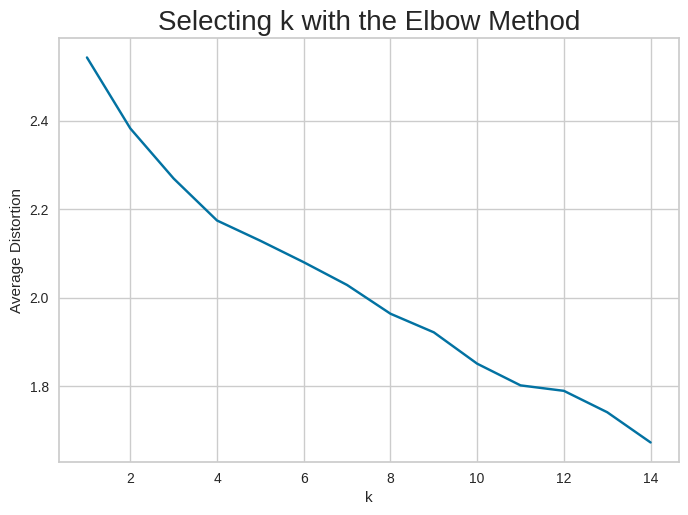

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()



*  From the elbow curve, 2, 4, and 11 appear to be good candidates for k, the number of clusters



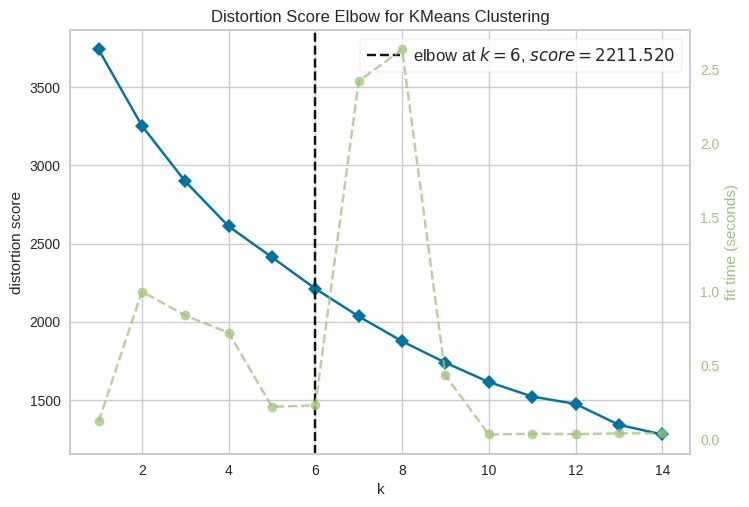

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure



*   The KElbowVisualizer of the yellowbrick.cluster library suggests an elbow at k=6 with a fit time of about 50 ms



### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


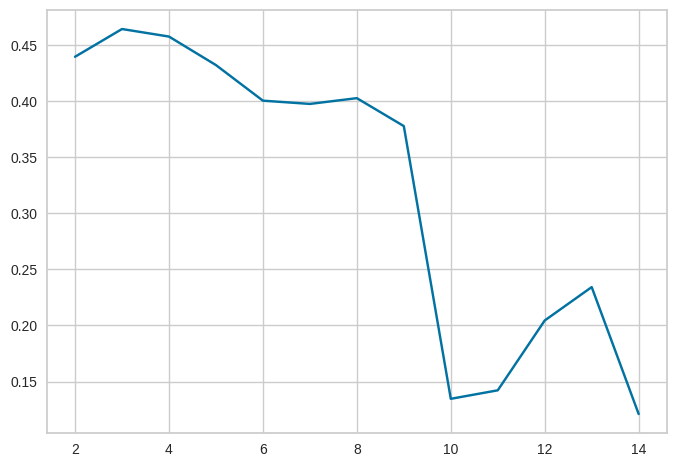

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()



*   The greatest silhouette score is registered for 3 clusters followed by 4 then 2 clusters



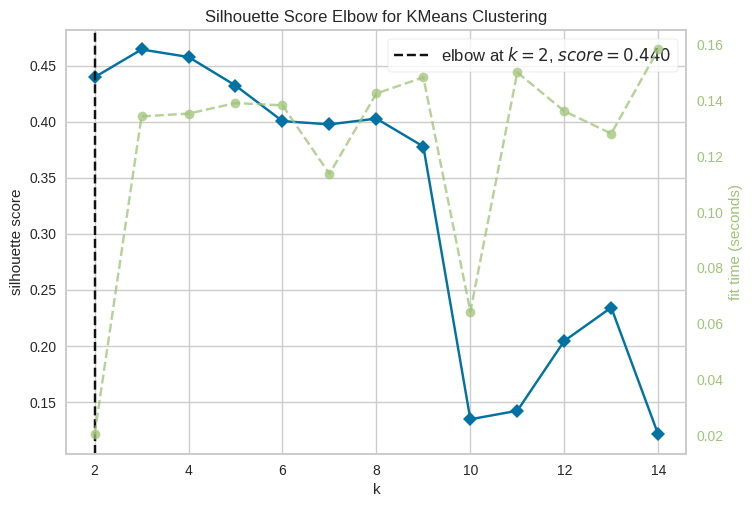

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure



*   Using the silhouette metric, the KElbowVisualizer of the yellowbrick.cluster library suggests an elbow at k=2 with a score of 0.44 and a fit time of about 260 ms



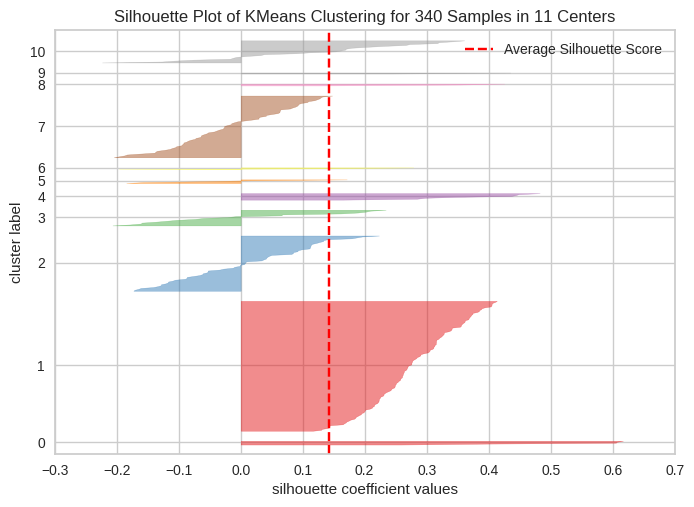

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

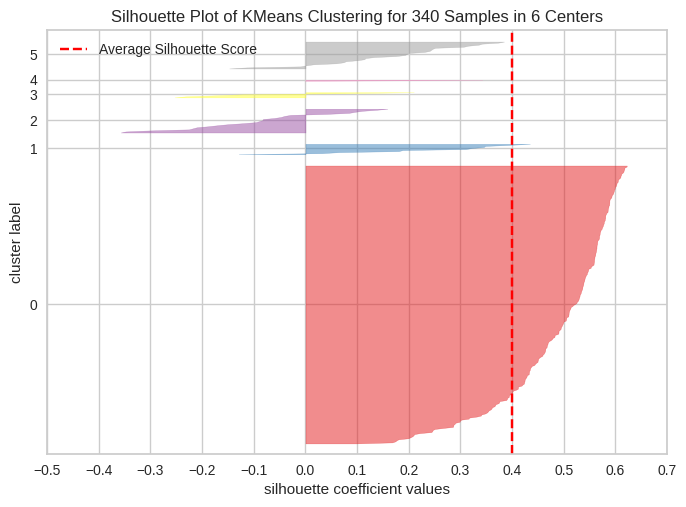

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

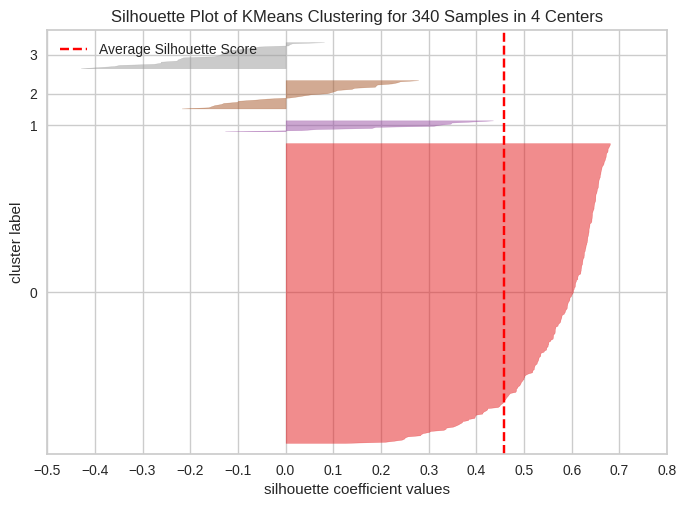

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

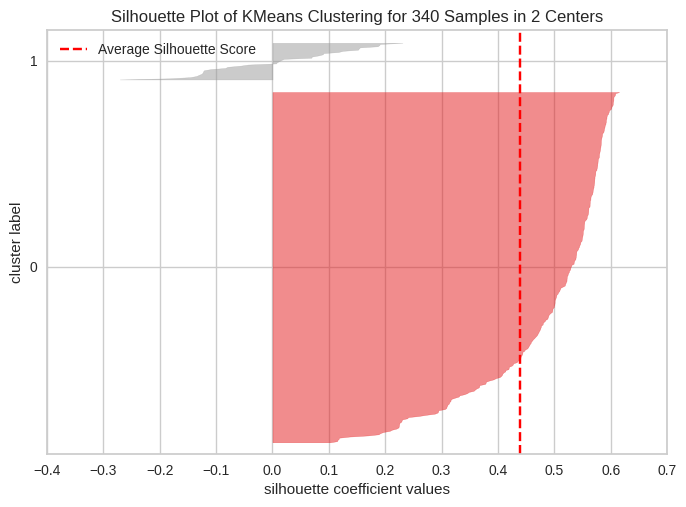

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()



*   We will be choosing 4 as the appropriate number of clusters since it has a relatively (about 0.46) high silhouette score and there is a knick in the elbow curve at k=4



### Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="darkgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25




*   KM_Segment 0 has the greatest number of companies whereas Cluster 1 has the least
*   KM_Segment 1 has the greatest average Net Income and Estimated Shares Outstanding
*   KM_Segment 2 has the greatest Volatility, ROE, and P/E Ratio
*   KM_Segment 3 has the greatest Current Price, Price Change, Cash Ratio, Net Cash Flow, Earnings Per Share, and P/B Ratio
*   It appears KM_Segment 0 comprises of the majority of companies with relatively low financial metrics while the other 3 KM Segments constitute, each, of relatively few companies with high financial performance, demonstrated via diverse metrics







In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl



*   As expected, we observe that KM Segments 1, 2, and 3 contain some well known big players such as Coca Cola, Pfizer, Ford Motor, Yahoo, Facebok, and some Oil And Gaz Companies



In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform



*   KM_Segment 0 has the largest number of GICS Sectors (11) followed by KM_Segment 3 (8) and KM_Segment 1 (7); KM_Segment 2 contains the least number of GICS Sectors (4)
*   Telecommunications Services are spread across KM Segments 0, 1, and 3
*   Consumer Discretionary is most represented in KM_Segment 0 and least in KM_Segment 2 where is has no representation at all, same with Financials, Consumer Staples, and a couple other sectors
*   Utilities are only found in KM_Segment 0





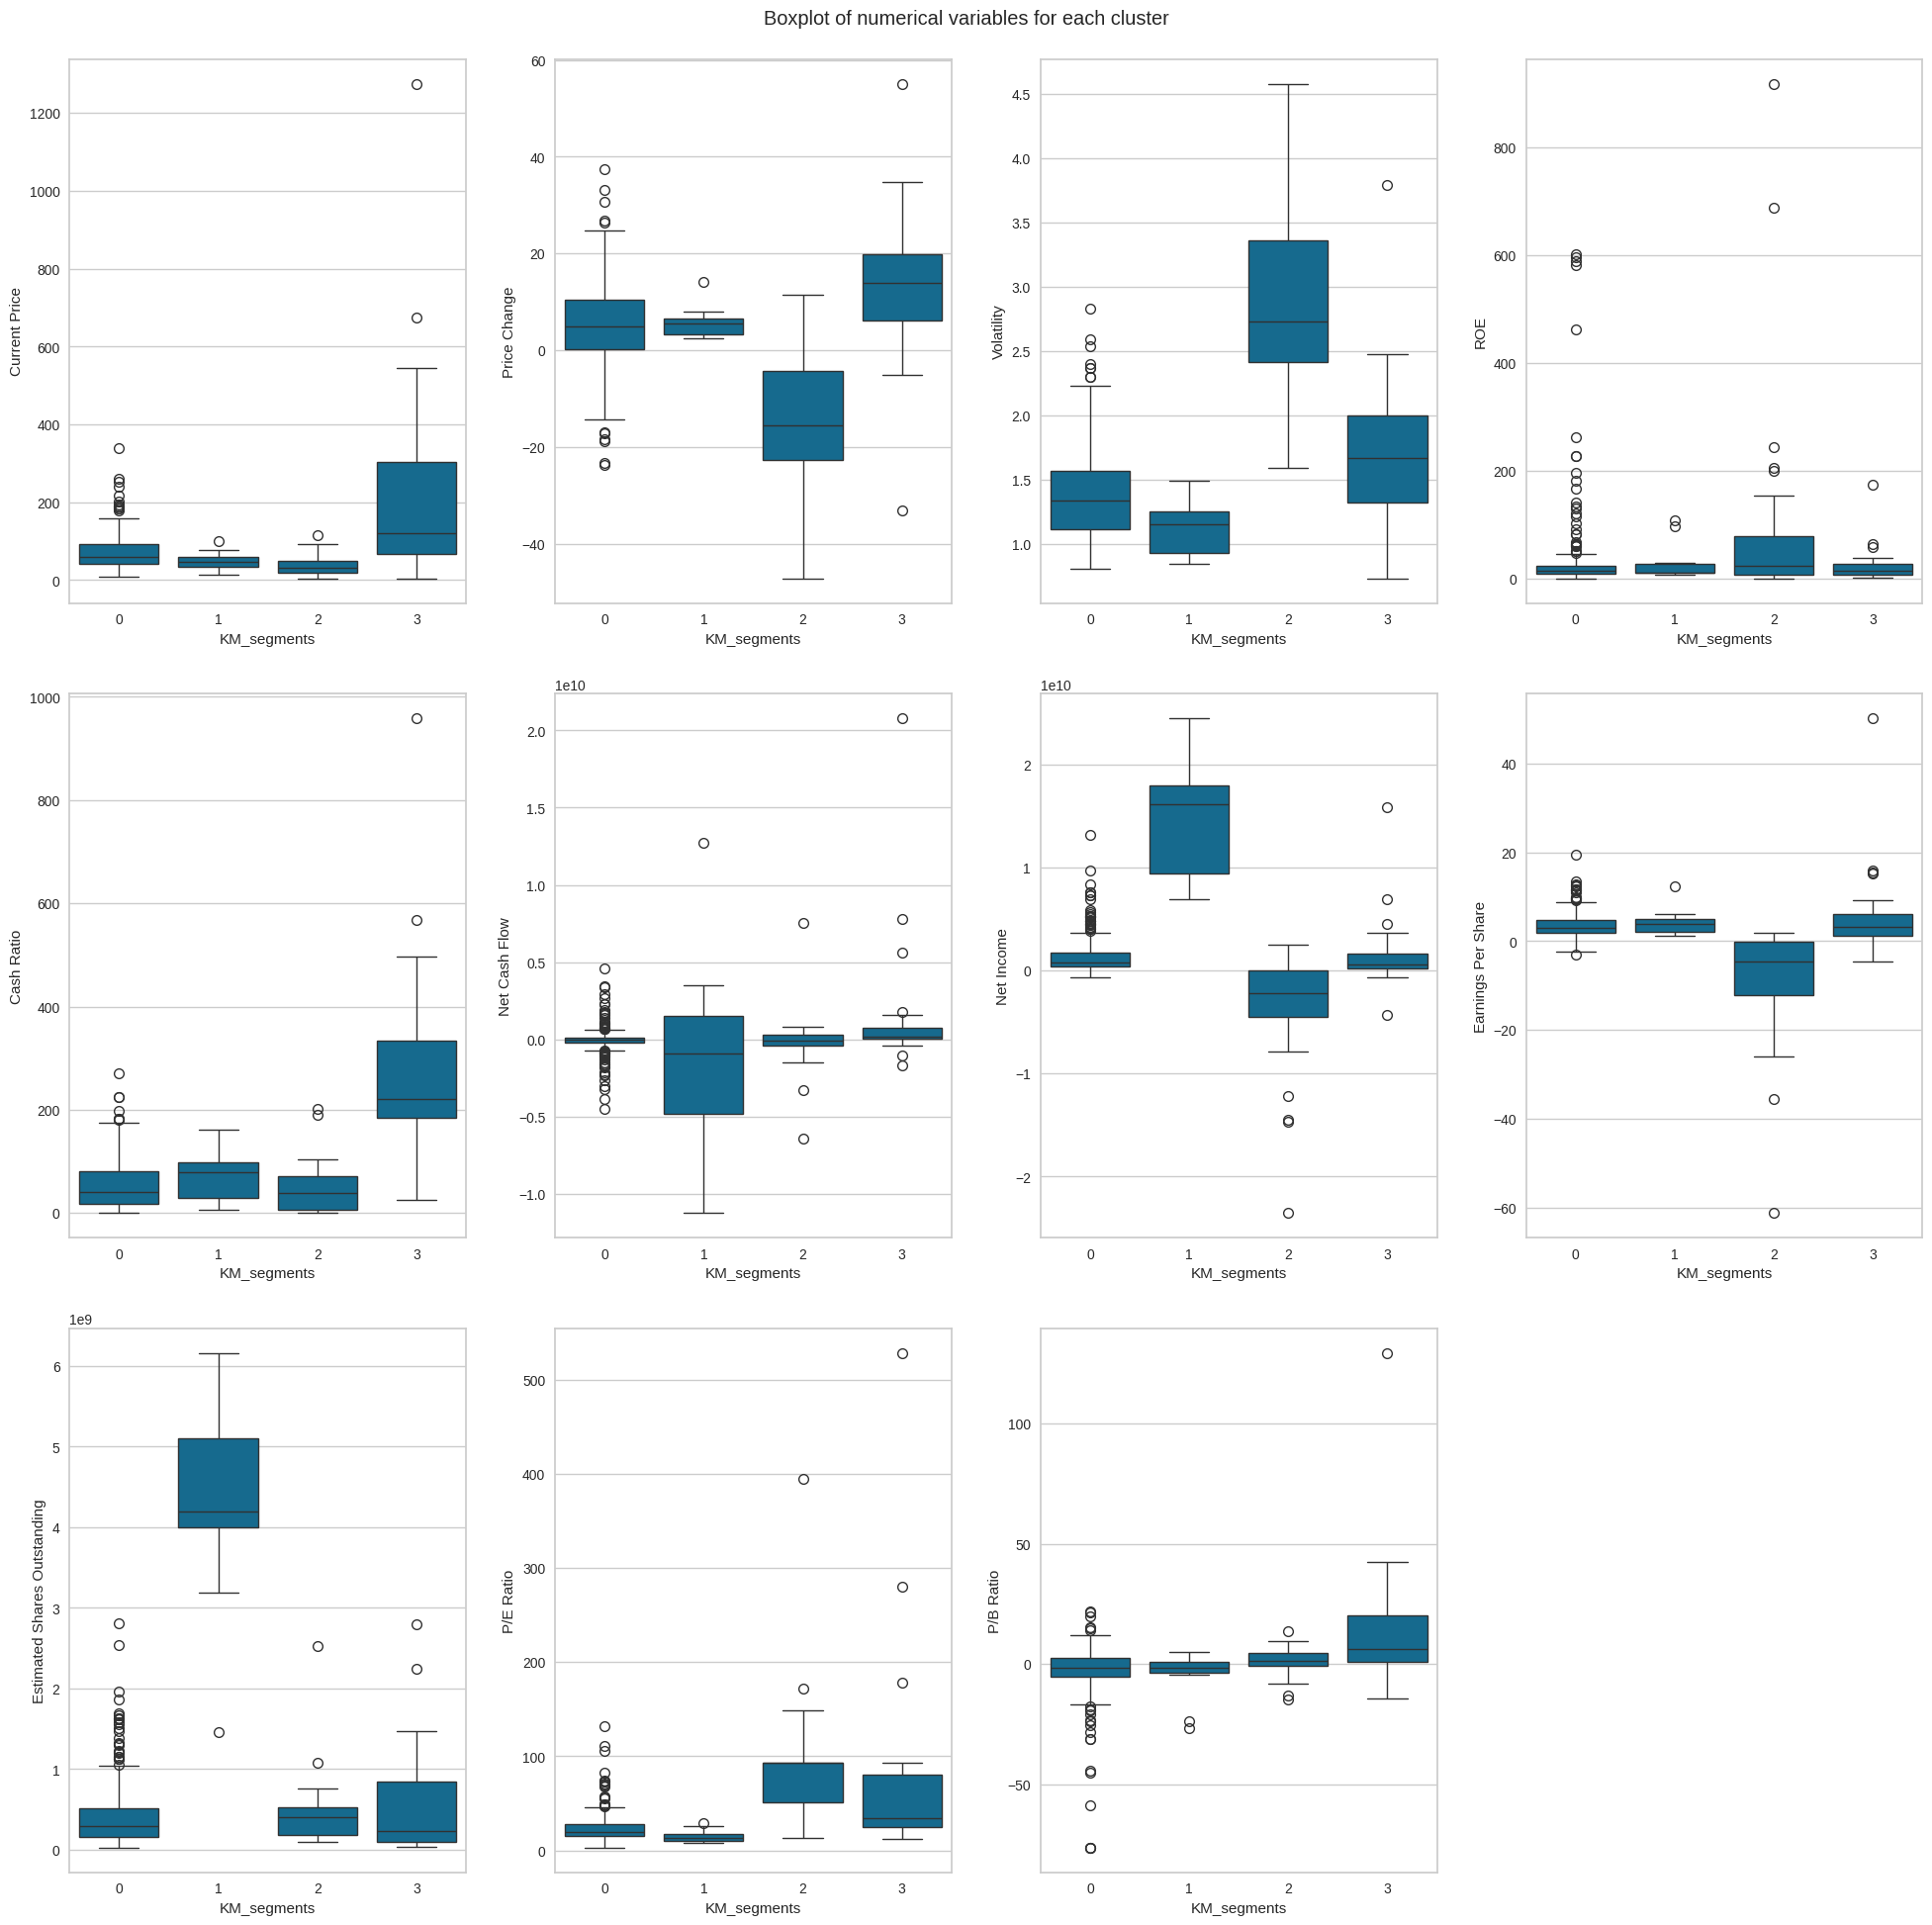

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)



*   The boxplots confirm the information obtained from the profile highlight
*   In addition, signification variation is observed in Current Price, Cash Ratio, P/E Ratio, and P/B Ratio for KM_Segment 3, Price Change, Volatility, ROE, and Earnings Per Share for KM_Segment 2, and Net Cash Flow, Net Income, and Estimated Shares Outstanding for KM_Segment 1





### Insights


- **KM_Segment 0**
   - Has 277 companies
   - Low Current Price, Volatility, and Cash Ratio
   - Moderate to high Price Change
   - Low ROE
   - Moderate Net Cash Flow, Net Income, and Earnings Per Share
   - Low Estimated Shares Outstanding, P/E Ratio, and P/B Ratio


- **KM_Segment 1**
   - 11 companies
   - Low to moderate Current Price
   - Moderate Price Change
   - Low to moderate Current Price, ROE, and Cash Ratio
   - Low Volatility, P/E Ratio, and P/B Ratio
   - Low but varied Net Cash Flow   
   - High and varied  Net Income
   - Relatively High Earnings Per Share
   - High and varied Estimated Shares Outstanding
   
   
- **KM_Segment 2**
   - 27 companies
   - Low Current Price, Cash Ratio, Net Income, and Estimated Shares Outstanding
   - Low and varied Price Change and Earnings Per Share
   - High and varied Volatility
   - Relatively high and varied ROE
   - Low to moderate Current Price
   - Medium Net Cash Flow and P/B Ratio
   - High P/E Ratio
      
   
- **KM_Segment 3**
   - 25 companies
   - High and varied Current Price, Price Change, Cash Ratio, and P/B Ratio
   - Medium Volatility, Net Income, and Earnings Per Share
   - Low ROE
   - High Net Cash Flow
   - Low and varied Estimated Shares Outstanding
   - Medium and varied P/E Ratio

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla



*   Highest cophenetic correlation is 0.94, which is obtained with Euclidean distance and average linkage



**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.




*   Highest cophenetic correlation with euclidean distance is 0.94, which is obtained with average linkage.



**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

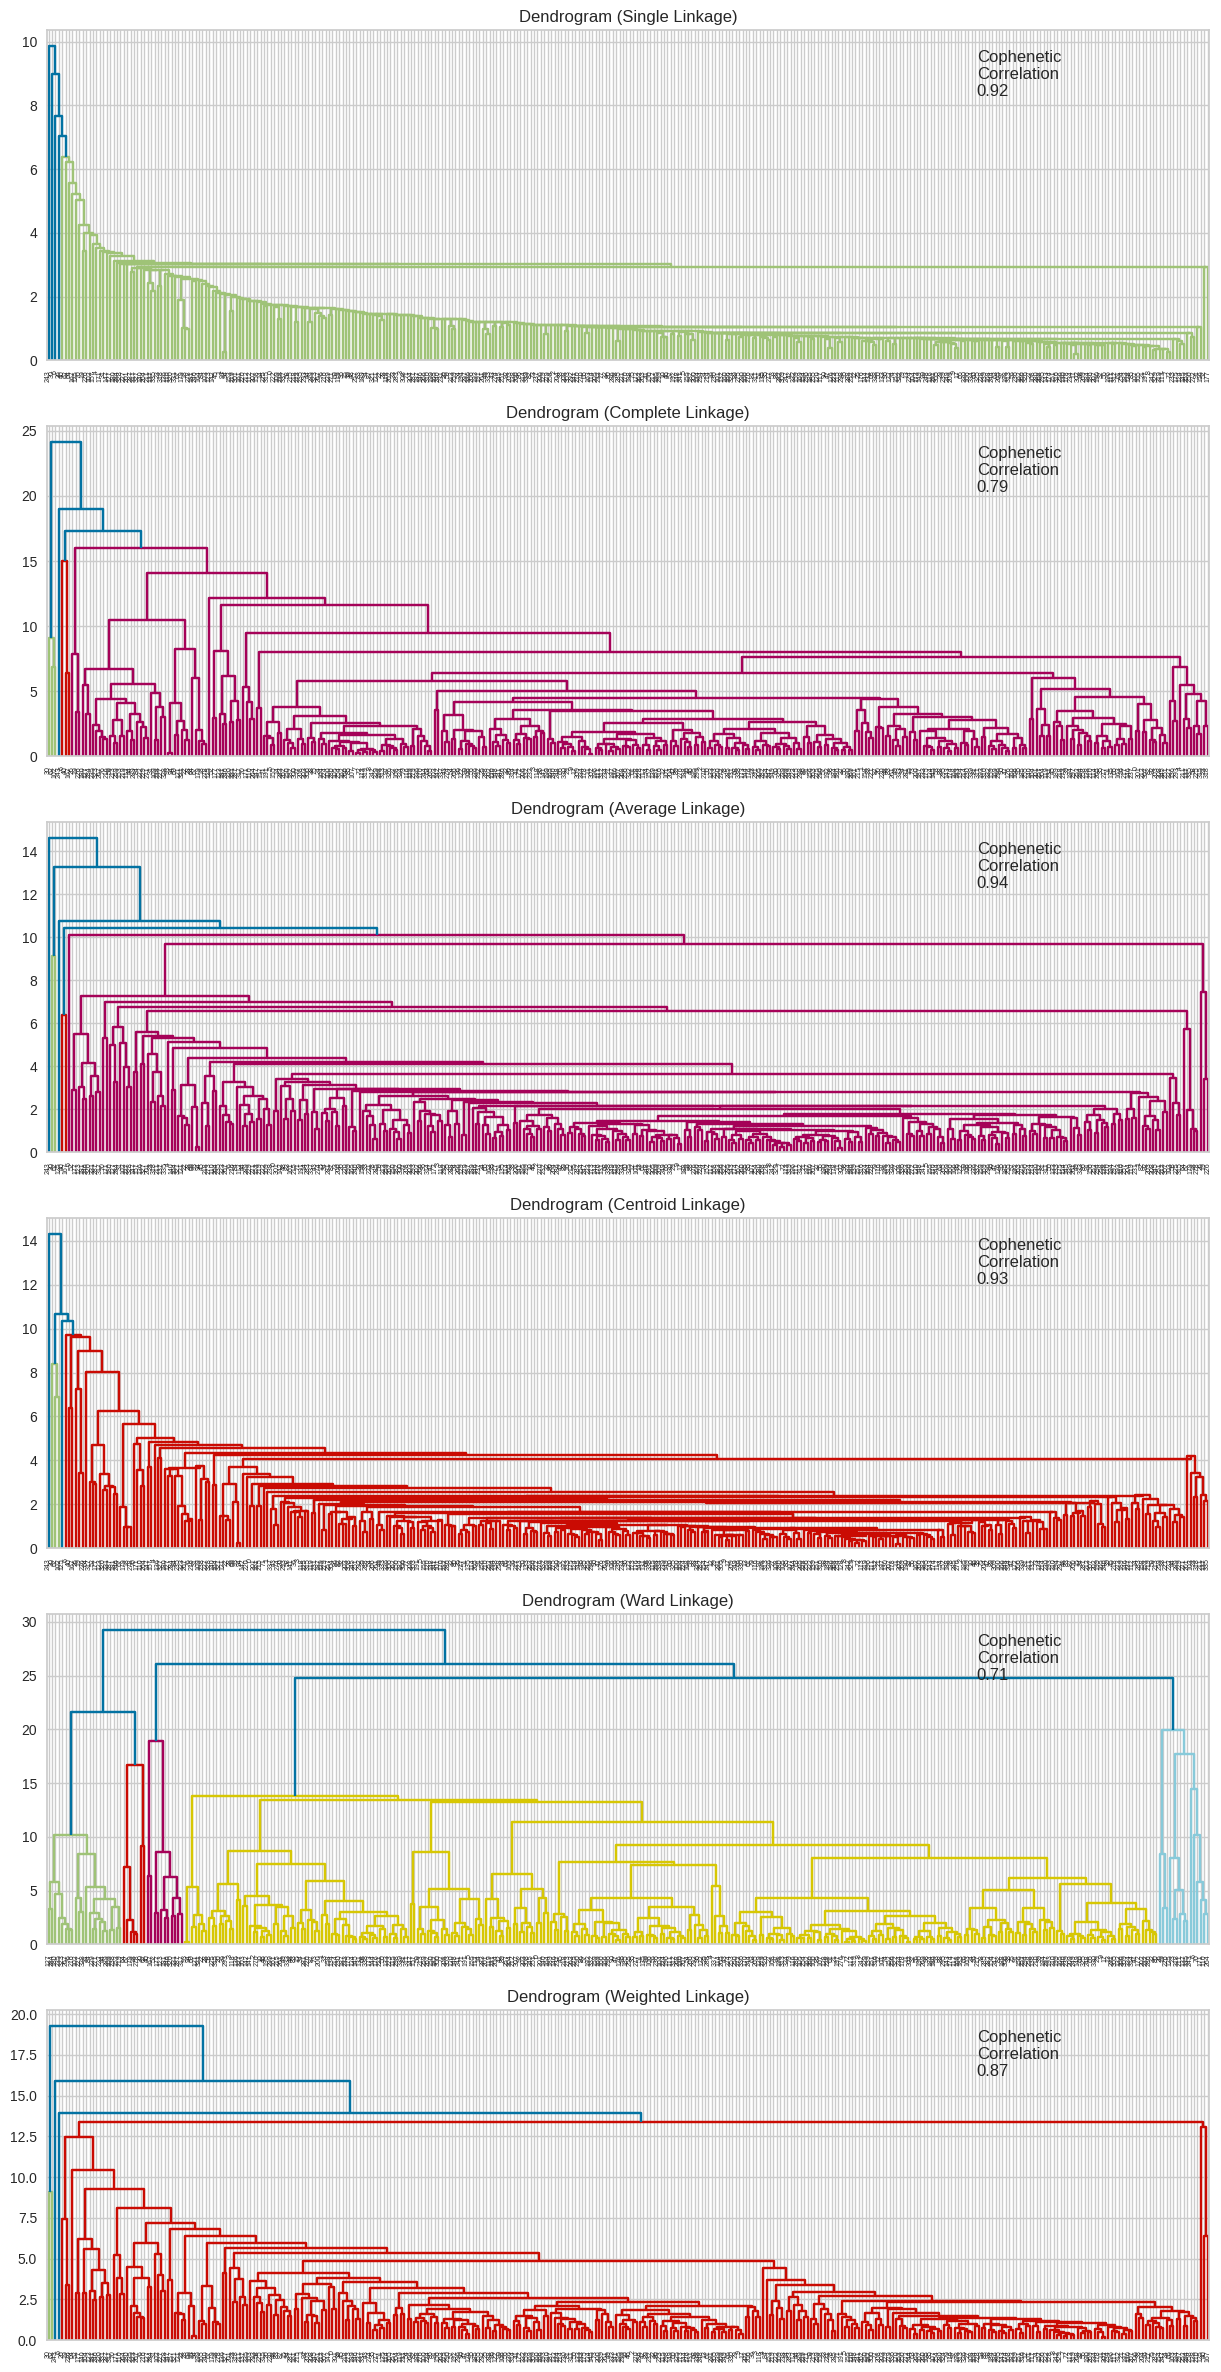

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

- The cophenetic correlation with euclidean distance is highest for average linkage (0.94).
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage (At a distance of 10)

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254




*   With the euclidean distance, average linkage has the highest cophenetic coefficient (0.94) whereas ward linkage has the least cophenetic coefficient (0.71)
*   We will however move ahead with ward linkage since it has the most distinct and separated clusters; from the dendrogram, 6 appears to be the appropriate number of clusters (just below a distance of 20)







### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="darkgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3




*   HC_segment 0 registered the highest Net Income and Estimated Shares Outstanding
*   HC_segment 1 registered the highest ROE
*   HC_segment 2 registered the highest Cash Ratio, Earnings Per Share, and P/B Ratio
*   HC_segment 3 contains the greatest number of companies (285) but is not outstanding in any of the financial metrics - the large majority of average companies
*   HC_segment 4 registered the highest Volatility
*   HC_segment 5 registered the highest Current Price, Price Change, Net Cash Flow, and P/E Ratio but contains the lowest number of companies (3) - clearly a segment of elite companies

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim



*   As espected HC_Segment 5 contains major players such as Amazon and Netflix
*   The other high end HC Segments (0, 1, 2, and 4) also contain major companies such as Facebook, Yahoo, S&P Global, Coca Cola, JPMorgan Chase & Co., and some Oil and Gaz companies



In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy



*   HC_Segment 3 contains the greatest number of GICS Sectors
*   Telecommunications Services, Information Technology, Consumer Discretionary, and a few other GICS Sectors are spread oveer several HC Segments
*   Real Estate is found only in HC Segments 2 and 3
*   Materials are only found in HC Segments 3 and 4
*   Utilities are only found in HC Segments 3

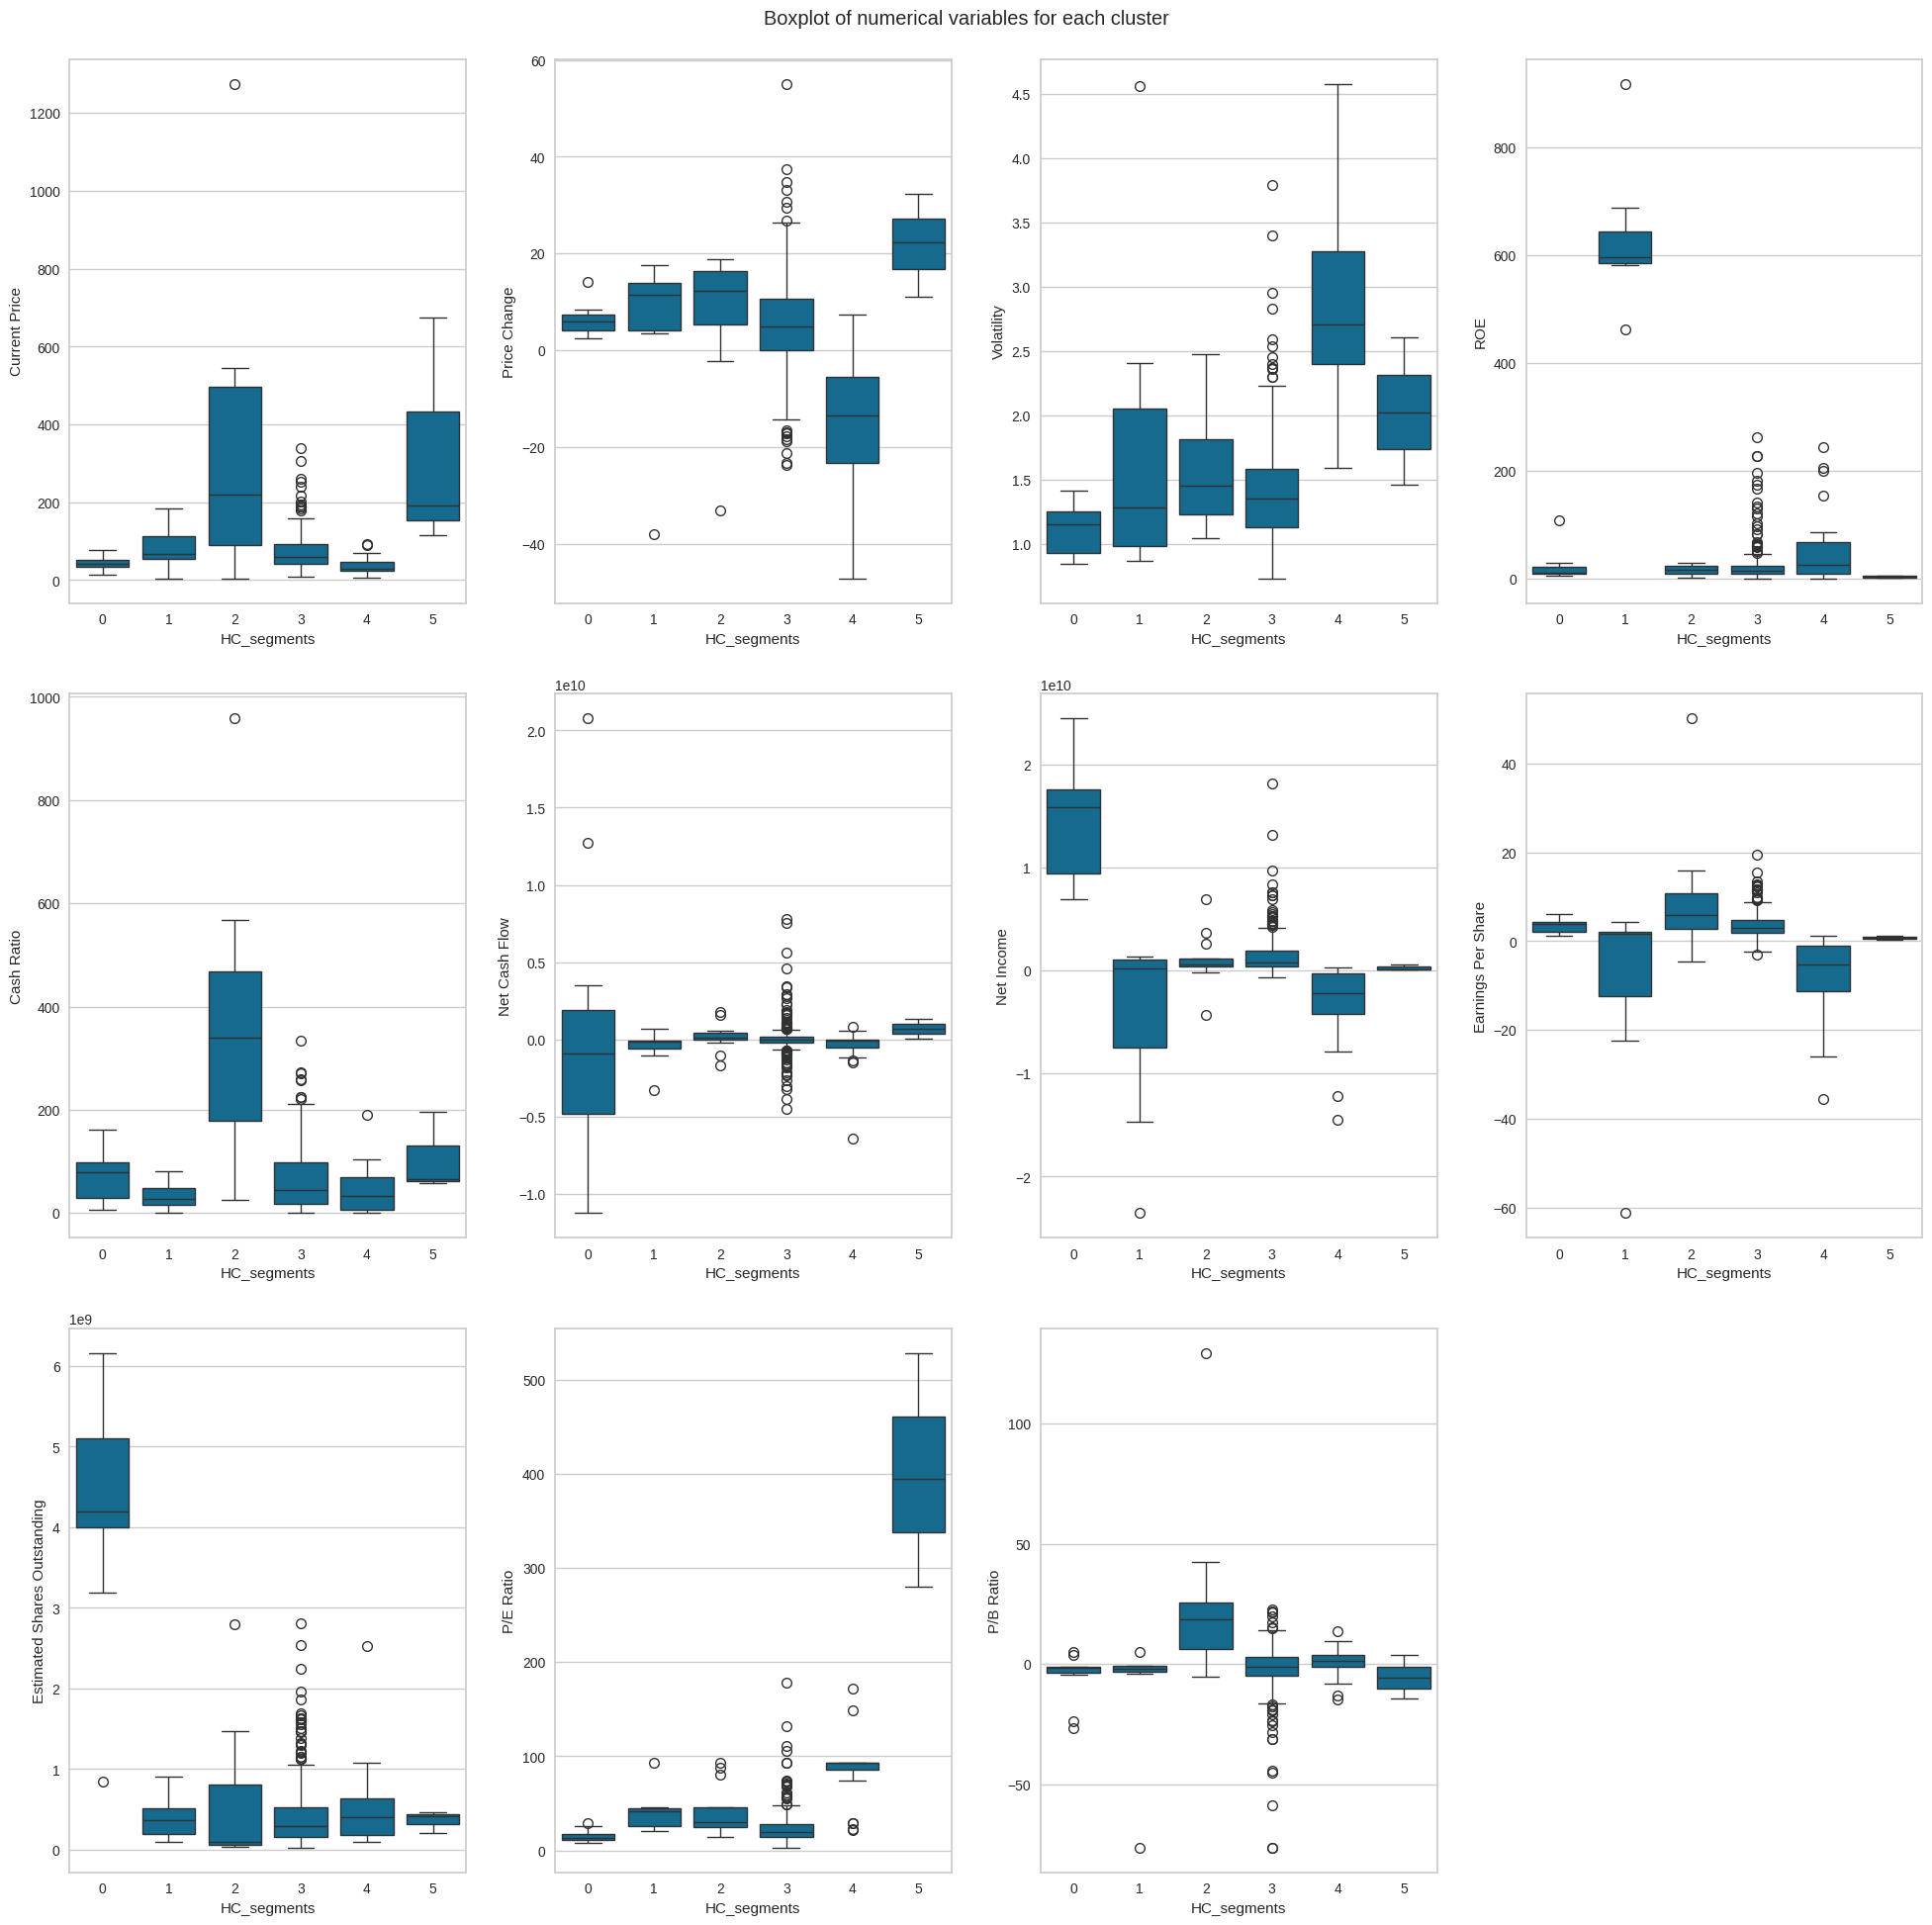

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

- **HC_Segment 0**
   - Has 11 companies
   - Low Current Price, Volatility, ROE, and P/E Ratio
   - Medium  Price Change, Earnings Per Share, and P/B Ratio
   - Low to medium Cash Ratio
   - Low and varied Net Cash Flow
   - High and varied Net Income and Estimated Shares Outstanding


- **HC_Segment 1**
   - Has 7 companies
   - Medium Current Price, Price Change, Net Cash Flow, Estimated Shares Outstanding, P/E Ratio, and P/B Ratio
   - Low Volatility and Cash Ratio
   - High ROE
   - Medium and varied Net Income and Earnings Per Share
   
   
- **HC_Segment 2**
   - Has 12 companies
   - High and varied Current Price, Cash Ratio, and P/B Ratio
   - Medium Price Change, Volatility, Net Cash Flow, Net Income, and P/E Ratio
   - Low ROE
   - High Earnings Per Share
   - Low and varied Estimated Shares Outstanding
      
   
- **HC_Segment 3**
   - Has 285 companies
   - Low to medium Current Price and Estimated Shares Outstanding
   - Medium Price Change, Volatility, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share, and P/B Ratio
   - Low ROE and P/E Ratio
      
   
- **HC_Segment 4**
   - Has 22 companies
   - Low Current Price, Cash Ratio, Net Income, and Earnings Per Share
   - Low and varied Price Change
   - High and varied Volatility
   - Medium and varied ROE
   - Medium Net Cash Flow, Estimated Shares Outstanding, P/E Ratio, and P/B Ratio
      
   
- **HC_Segment 5**
   - Has 3 companies
   - Medium to high Current Price and Volatility
   - High Price Change
   - Medium Net Income, Cash Ratio, and Earnings Per Share
   - Low ROE and P/B Ratio
   - Relatively high Net Cash Flow
   - Low to medium Estimated Shares Outstanding
   - High and varied P/E Ratio

## K-means vs Hierarchical Clustering

* It took about 31s to display the dendrograms of the different linkage methods with the Euclidean distance whereas fitting of K-Means for different values of k was accomplished in milliseconds
* As concerns the clustering performance of each technique:
    * Of the 13 values of K evaluated, the chosen number of clusters, 4, registered the second highest silhouette score (about 0.46)
    * Of the various linkage vs distance combinations evaluated for the hierarchical clustering, the chosen combination, ward linkage – Euclidean distance, registered a relatively low cophenetic score (0.71) but was chosen because, from the dendrogram, its clusters appeared to be the most distinct and separated; number of clusters chosen: 6
* Certain observations on corresponding similar clusters across both techniques:
    * The smallest HC Segment (5) contains 11 companies whereas the smallest KM Segment (1) has 3 companies. They appear to perform best on different metrics: HC_Segment 5 performs best on Price Change, Cash Flow, and P/E Ratio whereas KM_Segment 1 on Net Income, Earnings Per Share, and Estimated Shares Outstanding
    * The largest HC Segment (3) contains 285 companies whereas the largest KM Segment (0) contains 277 companies. Both have low to medium performance on the various metrics
    * Intermediate size clusters obtained using each technique display varying levels of performance on the provided metrics

## Actionable Insights and Recommendations

* Considering execution time, relative clustering performance measured, and number of clusters, K-Means 4 cluster option appears to be a preferable choice to the clusters obtained using hierarchical clustering
* Investment in KM_Segment 1 appears to be a safe bet considering the associated low to moderate current price of shares and high earnings per share; however, the benefits should be weighed against the relatively low to moderate ROE and Cash Ratio
* KM_Segment 2 also has a low to moderate price and thus relatively affordable shares. However, compared to earnings, the stocks might be considered expensive due to the high P/E ratio. Moreover, the low Cash Ratio and Earnings Per Share might be further reason to be careful about investment in this cluster
* KM_Segment 3 is characterized by high Current Price, Price Change, and P/B ratio. These characteristics render investment in this cluster expensive and risky. Though the Cash Ratio is high, the related benefit should be measured against the low ROE that characterizes the cluster.
* KM_Segment 3 is a low-risk, low-return cluster since all the reported metrics are low to moderate. It would be advisable for an investor to make minimal investment in this sector, if interested; however, the investment should be spread across several companies to further take advantage of the low-risk that characterizes the cluster


___